I have deviated a bit from the original project by Alex. Click the link to see the original [Instrcutions for this project](https://www.youtube.com/watch?v=HiOtQMcI5wg)

### Import libraries

In [1]:
# import libraries 

# requesting webpages
import requests

# we'll use this to grab a timestamp when the script runs
import datetime

# creating and finding matches for regular expressions
import re

# dataframe library
import pandas as pd

# parisng html
from bs4 import BeautifulSoup

# prompting user for input
import pyinputplus as pyip

# logging module for debugging 
import logging

### Function definition

In [2]:
# Connect to website
def initialScrapingData(URL, headers):
    # saving webpage response to a variable
    page = requests.get(URL, headers = headers)

    # assinging parsed html to a variable
    soupObject = BeautifulSoup(page.content, "html.parser")
    
    return soupObject

In [3]:
def getTitle(soupObj):
    # scrapes title text
    titleRaw = soupObj.find(id = 'productTitle').get_text()

    # cleans title text by stripping trailing whitespace
    title = titleRaw.strip()
    
    return title

def getAuthor(soupObj):
    # scrapes byline text
    bylineRaw = soupObj.find(id = 'bylineInfo').get_text()

    # cleans up the byline text by removing newline characters and stripping trailing whitespace
    byline = bylineRaw.replace('\n','').strip()

    # extract author name from byline 

    # create a regex object to extract the author name 
    # searches for 'by' followed by upper (A-Z) and lowercase (a-z) letters, commas (,) or spaces (\s) any number (*) of times
    authorRegex = re.compile(r'(by)([a-z A-Z \s ,]*)') 

    # searches the text for the pattern
    authorMatchObj = authorRegex.search(byline)

    # pulls out just the authors name and assigns it to a variable named author 
    author = authorMatchObj.group(2).strip()
    
    return author


def getISBN(soupObj):
    # scrapes details text
    detailsRaw = soupObj.find(id = 'detailBullets_feature_div').get_text()

    # cleans up the details text by removing newline characters and stripping trailing whitespace
    details = detailsRaw.replace('\n','').strip()

    # extract ISBN10 and ISBN13 from details

    ISBNRegex = re.compile(r'(ISBN-10|ISBN-13)(\s*)(\S*)(\s*)(:)(\s*)(\S*)(\s*)([\d -]*)') 

    # searches the text for the pattern
    ISBNMatchObj = ISBNRegex.findall(details)

    ISBN10 = ISBNMatchObj[0][8]
    ISBN13 = ISBNMatchObj[1][8]
    
    return ISBN10, ISBN13 

def getPrice(soupObj):
    # scrapes product price
    priceRaw = soupObj.find(id = 'price').get_text()

    # cleans up the price text by stripping trailing whitespace 
    # and selecting a slice of the text starting AFTER the $ sign
    price = priceRaw.strip()[1:]

In [4]:
# Create dataframe 
def createbooksdf():
    columnList = ['Timestamp','Title','Author','ISBN-10','ISBN-13','Price']
    df = pd.DataFrame(columns = columnList)
    
    return df

In [5]:
# Save dataframe to excel

def saveToExcel(df):
    
    # prompts user for a filename, and appends excel file extension & saves the string to variable excelName
    excelName = pyip.inputStr(prompt = 'Please enter a filename') + '.xlsx'
    df.to_excel(excelName, index = False)

### Iterating over a list of book URLs to populate a DataFrame

In [6]:
# initialize and empty dataframe
toBeReadDF = createbooksdf()

In [7]:
# make a list of book urls
bookList = ['https://www.amazon.com/Los-se%C3%B1ores-narco-Narcoland-Spanish/dp/1644732068/ref=tmm_pap_swatch_0?_encoding=UTF8&qid=1639844713&sr=8-2',
'https://www.amazon.com/Overcoming-Gravity-Systematic-Gymnastics-Bodyweight/dp/0990873854',
'https://www.amazon.com/Cerro-Gordo-Images-America-Cecile/dp/0738595209',
'https://www.amazon.com/Little-Book-Common-Sense-Investing/dp/1119404509',
'https://www.amazon.com/dp/0822370816/?coliid=I36NAOWADFVBX4&colid=2WQYQTWJTEP80&psc=1&ref_=lv_ov_lig_dp_it']

In [8]:
# saving headers information to a variable
headers = {"User-Agent":xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"}

logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s -  %(levelname)s -  %(message)s')

# loop will append to the dataframe

for book in bookList:
    
    URL = book
    logging.debug(f'Current URL: {URL}')
    
    try:
        bookSoupObject = initialScrapingData(URL, headers = headers)
    
    except: 
        continue
    
    # captures current date and timestamp and assigns it to the timeStamp variable
    timeStamp = datetime.datetime.now()
    logging.debug(f'Current timeStamp: {timeStamp}')
    
    try:
        title = getTitle(bookSoupObject)
        author = getAuthor(bookSoupObject)
        logging.debug(f'Tite: {title} Author: {author}.')
        
    except:
        
        logging.debug(f'Could not find Title and/or Author for this book.')
        continue
    
    
    try:
        
        ISBN10, ISBN13 = getISBN(bookSoupObject)
        logging.debug(f'ISBN10: {ISBN10} ISBN13: {ISBN13}.')
        
    except: 
        ISBN10, ISBN13 = '',''
        logging.debug(f'Could not find ISBN number(s) for this book.')
    
    try:
        
        price = getPrice(bookSoupObject)
        logging.debug(f'Price: {price}')
    
    except: 
        price = ''
        logging.debug(f'Could not find price for this book.')
    
    toBeReadDF = toBeReadDF.append({'Timestamp': timeStamp,'Title':title ,'Author':author ,'ISBN-10':ISBN10 ,'ISBN-13':ISBN13 ,'Price':price},ignore_index = True)

 2021-12-18 18:00:54,511 -  DEBUG -  Current URL: https://www.amazon.com/Los-se%C3%B1ores-narco-Narcoland-Spanish/dp/1644732068/ref=tmm_pap_swatch_0?_encoding=UTF8&qid=1639844713&sr=8-2
 2021-12-18 18:00:54,528 -  DEBUG -  Starting new HTTPS connection (1): www.amazon.com:443
 2021-12-18 18:00:54,795 -  DEBUG -  https://www.amazon.com:443 "GET /Los-se%C3%B1ores-narco-Narcoland-Spanish/dp/1644732068/ref=tmm_pap_swatch_0?_encoding=UTF8&qid=1639844713&sr=8-2 HTTP/1.1" 200 None
 2021-12-18 18:00:56,966 -  DEBUG -  Current timeStamp: 2021-12-18 18:00:56.966173
 2021-12-18 18:00:57,009 -  DEBUG -  Tite: Los señores del narco / Narcoland (Spanish Edition) Author: Anabel Hernandez.
 2021-12-18 18:00:57,054 -  DEBUG -  ISBN10: 1644732068    ISBN13: 978-1644732069   .
 2021-12-18 18:00:57,060 -  DEBUG -  Price: None
 2021-12-18 18:00:57,070 -  DEBUG -  Current URL: https://www.amazon.com/Overcoming-Gravity-Systematic-Gymnastics-Bodyweight/dp/0990873854
 2021-12-18 18:00:57,076 -  DEBUG -  Starti

In [9]:
# return dataframe to view results
toBeReadDF

,Timestamp,Title,Author,ISBN-10,ISBN-13,Price
0,2021-12-18 18:00:56.966173,Los señores del narco / Narcoland (Spanish Edi...,Anabel Hernandez,1644732068,978-1644732069,None
1,2021-12-18 18:00:59.722330,Overcoming Gravity: A Systematic Approach to G...,Steven Low,0990873854,978-0990873853,
2,2021-12-18 18:01:02.368482,Cerro Gordo (Images of America),Cecile Page Vargo,0738595209,978-0738595207,None
3,2021-12-18 18:01:05.308650,The Little Book of Common Sense Investing: The...,John C,1119404509,978-1119404507,None
4,2021-12-18 18:01:08.450830,My Life as a Spy: Investigations in a Secret P...,Katherine Verdery,0822370816,978-0822370819,


In [10]:
# saving the dataframe to excel
saveToExcel(toBeReadDF)

Please enter a filenametoBeRead


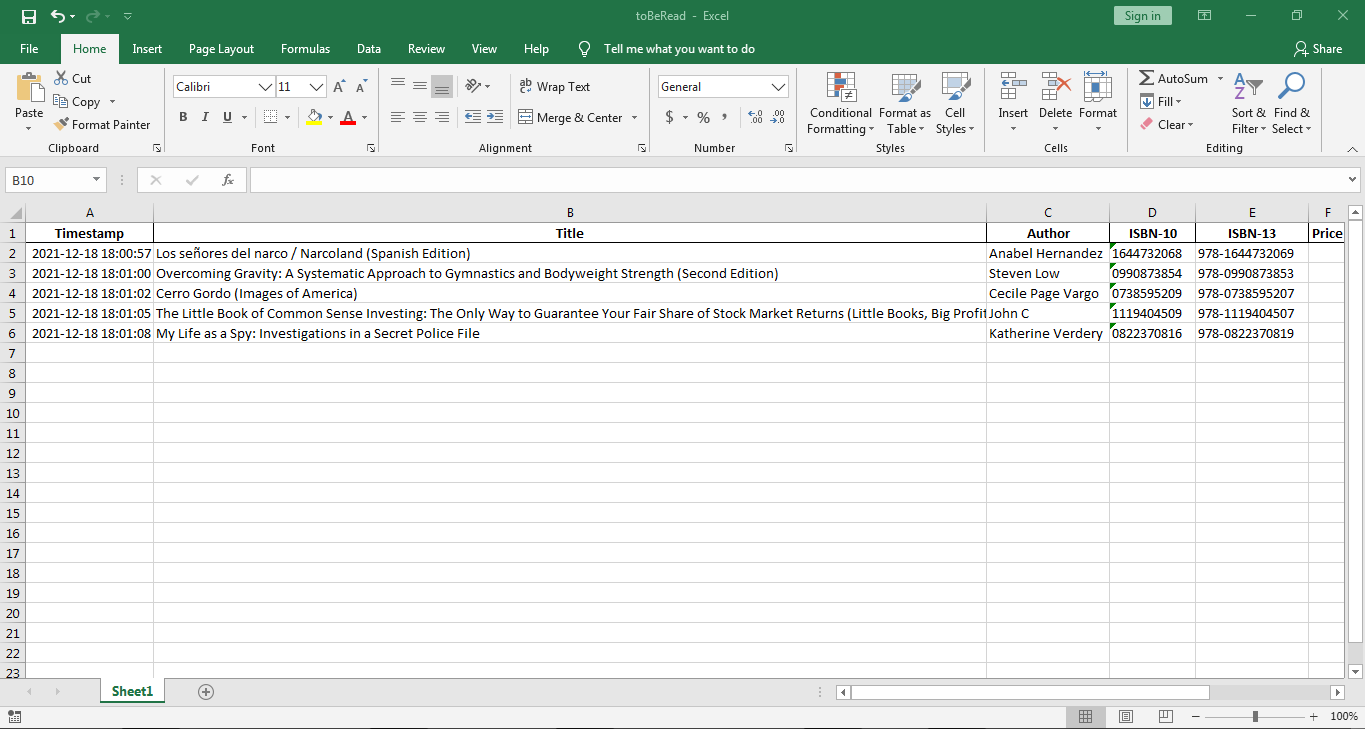

*Finished Excel sheet* 

I had no trouble finding the price for the first URL when I did scraping for just that book when I started this project. 
I may have written the function incorrectly to pull price or it does not apply universally. 
However, the title, author and ISBN numbers are most important to me as I believe I should be able to use them in a future project to talk to Goodreads API and get the metadata on these books in a much more clean fashion.

Using try/except statements allowed me to save what I could get and not worry about the details that weren't as important to me.
There are a lot more improvements that could be made to this script, but I am happy with where it is now.